In [2]:
from astropy import constants as const
print(const.R_sun.value)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
Rsol = const.R_sun.value
Lzp = 3.0128e28


695700000.0


In [3]:
def Mbol_cv(R, Teff):
    return -2.5 * np.log10((R**2 * Teff**4)/(Rsol**2 * 5777**4)) + 4.75
def Mbol_zp(R, Teff):
    return -2.5 * np.log10((4 * np.pi * const.sigma_sb.value * R**2 * Teff**4)/Lzp)

In [4]:
df = pd.read_csv('/home/oliver/PhD/Gaia_Project/data/KepxDR2/rcxyu18.csv')

In [5]:
Rstars = df.R_Clump * Rsol
Teffs = df.Teff

In [6]:
Mbolcv = Mbol_cv(Rstars, Teffs)
Mbolzp = Mbol_zp(Rstars, Teffs)

Diff: 0.013760516581256876


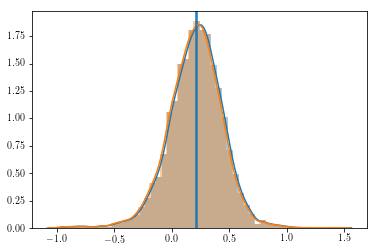

In [7]:
fig, ax = plt.subplots()
sns.distplot(Mbolcv)
ax.axvline(np.median(Mbolcv))
sns.distplot(Mbolzp)
ax.axvline(np.median(Mbolzp))

print('Diff: '+str(np.median(Mbolcv)-np.median(Mbolzp)))

plt.show()

-1.7183288220633741
-1.7271426505880005
-1.7133821340067437


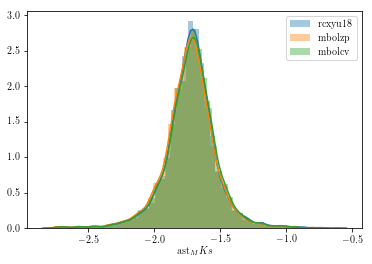

In [8]:
fig, ax = plt.subplots()
sns.distplot(df.ast_MKs, label='rcxyu18')
print(np.median(df.ast_MKs))
sns.distplot(Mbolzp - df.BC_K, label='mbolzp')
print(np.median(Mbolzp - df.BC_K))
sns.distplot(Mbolcv - df.BC_K, label='mbolcv')
print(np.median(Mbolcv - df.BC_K))
ax.legend()
plt.show()